Step 1: Importing Python libraries

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: Importing Customed Stock Dataset

In [2]:
path = r'/Users/matthewabrams/Desktop/Stocks Data/'
stocks = pd.read_csv(os.path.join(path, 'Stock Datasets/New Files/6_Stocks_Transformed.csv'), index_col = False)
stocks.drop(columns = 'Unnamed: 0', inplace = True)
stocks

,Date,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
0,2015-01-02,Amazon,55664000,15.4260,15.6290,15.7375,15.3480,NaN,NaN
1,2015-01-05,Amazon,55484000,15.1095,15.3505,15.4190,15.0425,NaN,NaN
2,2015-01-06,Amazon,70380000,14.7645,15.1120,15.1500,14.6190,NaN,NaN
3,2015-01-07,Amazon,52806000,14.9210,14.8750,15.0640,14.7665,NaN,NaN
4,2015-01-08,Amazon,61768000,15.0230,15.0160,15.1570,14.8055,NaN,NaN
...,...,...,...,...,...,...,...,...,...
15091,2024-12-24,Tesla,59551800,462.2800,435.9000,462.7800,435.1400,239.391967,233.094521
15092,2024-12-26,Tesla,76366400,454.1300,465.1600,465.3300,451.0200,240.972459,233.543151
15093,2024-12-27,Tesla,82666800,431.6600,449.5200,450.0000,426.5000,242.386011,233.922110
15094,2024-12-30,Tesla,64941000,417.4100,419.4000,427.0000,415.7500,243.700383,234.267726


Step 3: Descriptive Stats

In [3]:
stocks.describe()

,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
count,1.509600e+04,15096.000000,15096.000000,15096.000000,15096.000000,14004.000000,12912.000000
mean,6.103421e+07,176.535332,176.487295,178.860965,174.063377,172.653731,170.741612
std,6.256008e+07,146.962416,146.941842,148.870957,144.954963,133.289699,123.380357
min,1.144000e+06,9.578000,9.488000,10.331300,9.403300,14.051845,14.458877
25%,1.811868e+07,58.673125,58.559225,59.095975,58.012625,63.993417,69.789219
50%,4.190585e+07,145.340000,145.165000,147.130000,143.215000,150.155574,150.534616
75%,8.501708e+07,242.650000,242.587500,246.242500,238.835000,242.531544,249.282048
max,9.140820e+08,936.560000,933.350000,941.750000,923.080000,709.552623,596.174932


In [4]:
stocks.groupby('Stock_Name').describe().transpose()

Stock_Name                 Amazon         Apple          Meta     Microsoft  \
Volume        count  2.516000e+03  2.516000e+03  2.516000e+03  2.516000e+03   
              mean   7.614520e+07  1.170867e+08  2.288008e+07  2.887935e+07   
              std    4.061943e+07  6.839957e+07  1.489149e+07  1.336292e+07   
              min    1.500750e+07  2.323470e+07  4.726100e+06  7.164500e+06   
              25%    5.071022e+07  7.105610e+07  1.440050e+07  2.060978e+07   
              50%    6.526200e+07  1.003646e+08  1.921050e+07  2.572470e+07   
              75%    9.008800e+07  1.426216e+08  2.639298e+07  3.315840e+07   
              max    4.771220e+08  6.488252e+08  2.323166e+08  1.691640e+08   
Close in $    count  2.516000e+03  2.516000e+03  2.516000e+03  2.516000e+03   
              mean   1.012331e+02  9.636397e+01  2.222483e+02  1.877021e+02   
              std    5.417389e+01  6.525523e+01  1.216880e+02  1.228867e+02   
              min    1.434750e+01  2.258500e+01  7.405000e+01  4.029000e+01   
              25%    4.839713e+01  3.763938e+01  1.364025e+02  7.108000e+01   
              50%    9.457250e+01  6.666125e+01  1.830900e+02  1.534350e+02   
              75%    1.538562e+02  1.527725e+02  2.808725e+02  2.834975e+02   
              max    2.329300e+02  2.590200e+02  6.326800e+02  4.675600e+02   
Open in $     count  2.516000e+03  2.516000e+03  2.516000e+03  2.516000e+03   
              mean   1.012573e+02  9.627565e+01  2.221506e+02  1.876574e+02   
              std    5.420085e+01  6.517499e+01  1.217244e+02  1.228868e+02   
              min    1.431400e+01  2.250000e+01  7.404000e+01  4.034000e+01   
              25%    4.858350e+01  3.760688e+01  1.360175e+02  7.088750e+01   
              50%    9.455800e+01  6.655000e+01  1.830600e+02  1.519800e+02   
              75%    1.538754e+02  1.525725e+02  2.791675e+02  2.838700e+02   
              max    2.323900e+02  2.581900e+02  6.315000e+02  4.670000e+02   
High in $     count  2.516000e+03  2.516000e+03  2.516000e+03  2.516000e+03   
              mean   1.024060e+02  9.729970e+01  2.249749e+02  1.894414e+02   
              std    5.481932e+01  6.584931e+01  1.231828e+02  1.239561e+02   
              min    1.453950e+01  2.291750e+01  7.483000e+01  4.074000e+01   
              25%    4.882825e+01  3.804000e+01  1.378025e+02  7.160250e+01   
              50%    9.555600e+01  6.728125e+01  1.852000e+02  1.554800e+02   
              75%    1.559061e+02  1.545650e+02  2.852325e+02  2.870450e+02   
              max    2.330000e+02  2.601000e+02  6.384000e+02  4.683500e+02   
Low in $      count  2.516000e+03  2.516000e+03  2.516000e+03  2.516000e+03   
              mean   1.000044e+02  9.532394e+01  2.193914e+02  1.857868e+02   
              std    5.352663e+01  6.456779e+01  1.201604e+02  1.217141e+02   
              min    1.426250e+01  2.236750e+01  7.200000e+01  3.972000e+01   
              25%    4.808713e+01  3.729563e+01  1.342275e+02  7.032250e+01   
              50%    9.345250e+01  6.580750e+01  1.811650e+02  1.509650e+02   
              75%    1.517300e+02  1.508125e+02  2.762875e+02  2.801550e+02   
              max    2.280100e+02  2.576300e+02  6.272100e+02  4.644600e+02   
MA_Six_Months count  2.334000e+03  2.334000e+03  2.334000e+03  2.334000e+03   
              mean   1.007185e+02  9.376072e+01  2.147578e+02  1.839665e+02   
              std    4.892357e+01  6.013550e+01  9.786487e+01  1.136077e+02   
              min    2.119530e+01  2.526232e+01  8.384328e+01  4.463388e+01   
              25%    5.187800e+01  3.979064e+01  1.522523e+02  7.621671e+01   
              50%    9.546039e+01  6.682662e+01  1.816482e+02  1.556139e+02   
              75%    1.468468e+02  1.532224e+02  2.689032e+02  2.769961e+02   
              max    1.905904e+02  2.173302e+02  5.302277e+02  4.253760e+02   
MA_One_Year   count  2.152000e+03  2.152000e+03  2.152000e+03  2.152000e+03   
              mean   1.008385e+02  9.227470e+01  2

Step 4: Prepping for Visualizations

In [5]:
# Grabbing today's date
max_date = max(stocks['Date'])
max_date

'2024-12-31'

In [6]:
# Filtering the dataset by using today's date
stocks_max_date = stocks[stocks['Date']==max_date]
stocks_max_date

,Date,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
2515,2024-12-31,Amazon,24819700,219.39,222.97,223.23,218.94,190.590383,170.118411
5031,2024-12-31,Apple,39480700,250.42,252.44,253.28,249.43,217.330164,199.757616
7547,2024-12-31,Meta,6019500,585.51,592.27,593.97,583.85,530.227650,449.046329
10063,2024-12-31,Microsoft,13246500,421.50,426.10,426.73,420.66,425.358415,396.463014
12579,2024-12-31,Netflix,1875900,891.32,901.80,902.68,889.47,709.552623,596.174932
15095,2024-12-31,Tesla,76825100,403.84,423.79,427.93,402.54,244.968579,234.653863


Text(0.5, 1.0, 'Shares Traded per Stock For Today')

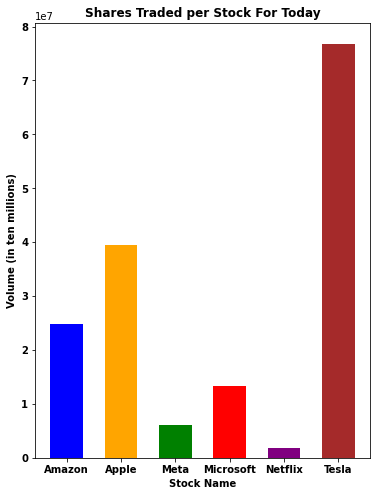

In [7]:
shares_volume = plt.figure(figsize=(6,8))
colors = ['blue','orange','green','red','purple','brown']
plt.bar(stocks_max_date['Stock_Name'], stocks_max_date['Volume'],
        color = colors, width = 0.6),
plt.xlabel('Stock Name', fontsize = 10, fontweight = 'bold')
plt.ylabel('Volume (in ten millions)', fontsize = 10, fontweight = 'bold')
plt.xticks(fontsize = 10, rotation = 0, fontweight = 'bold')
plt.yticks(fontsize = 10, fontweight = 'bold')
plt.title('Shares Traded per Stock For Today', fontsize = 12, fontweight = 'bold')

In [8]:
stocks['Date'] = pd.to_datetime(stocks['Date'])
stocks = stocks.set_index('Date')
stocks

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2015-01-02,Amazon,55664000,15.4260,15.6290,15.7375,15.3480,NaN,NaN
2015-01-05,Amazon,55484000,15.1095,15.3505,15.4190,15.0425,NaN,NaN
2015-01-06,Amazon,70380000,14.7645,15.1120,15.1500,14.6190,NaN,NaN
2015-01-07,Amazon,52806000,14.9210,14.8750,15.0640,14.7665,NaN,NaN
2015-01-08,Amazon,61768000,15.0230,15.0160,15.1570,14.8055,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-12-24,Tesla,59551800,462.2800,435.9000,462.7800,435.1400,239.391967,233.094521
2024-12-26,Tesla,76366400,454.1300,465.1600,465.3300,451.0200,240.972459,233.543151
2024-12-27,Tesla,82666800,431.6600,449.5200,450.0000,426.5000,242.386011,233.922110


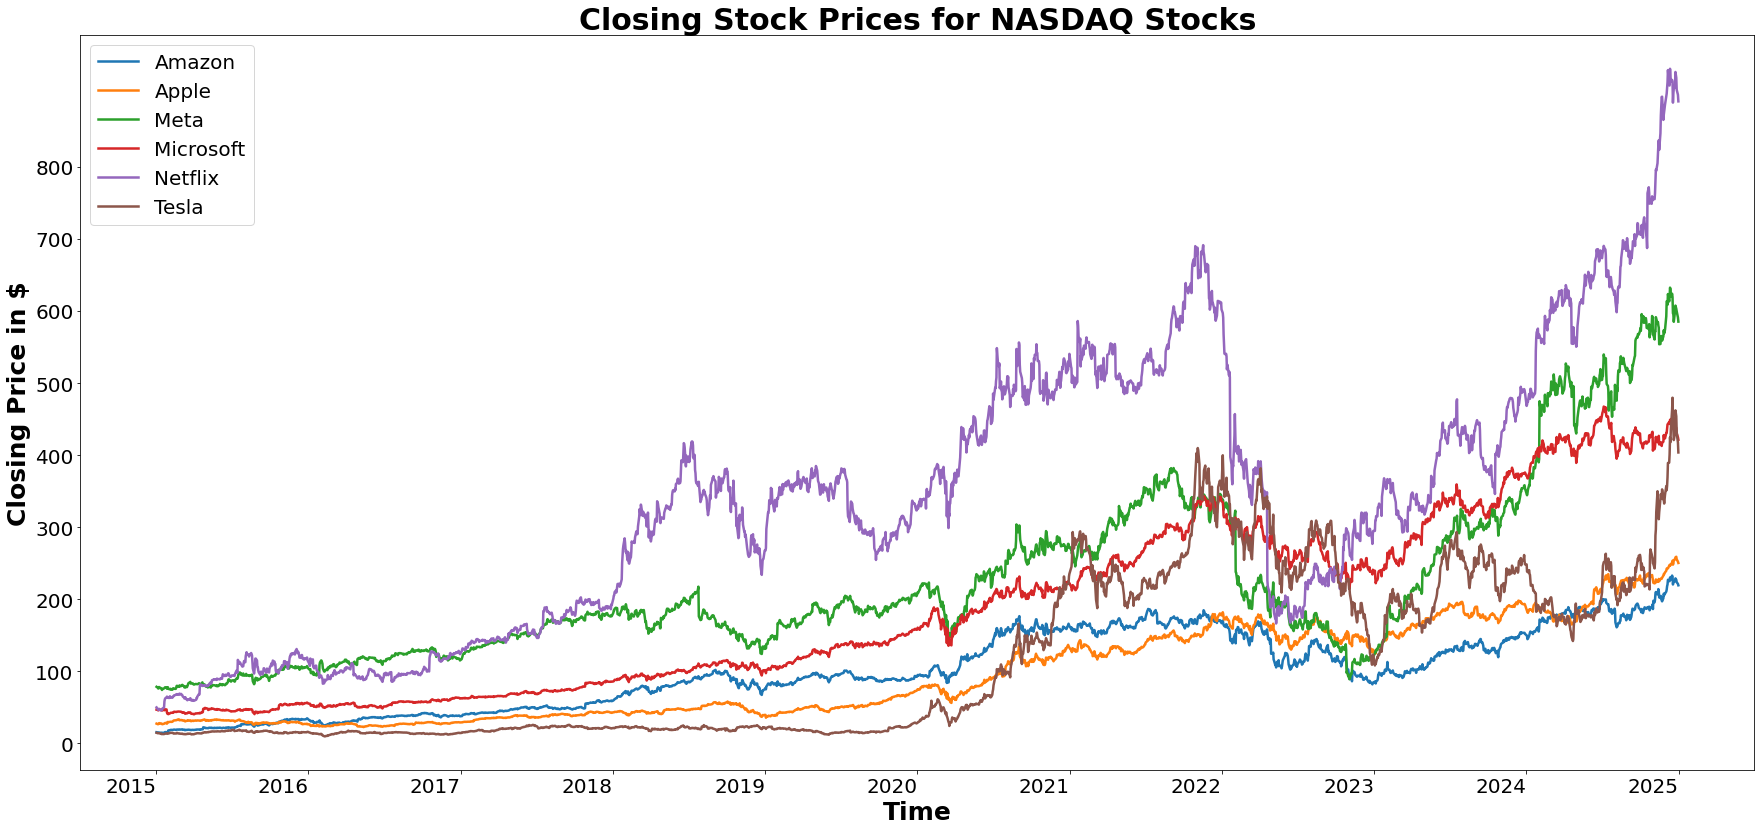

In [9]:
#Using a line chart to graph closing price of stocks within a 10 year frame
six_stocks_ten_years = plt.figure(figsize=(30,15))
stocks.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5)
plt.title('Closing Stock Prices for NASDAQ Stocks', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 900, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

In [10]:
# Breaking dataset into multiple where each one is assigned to one specific stock, prepping for moving average analysis

In [11]:
moving_average = stocks[stocks['MA_One_Year'].notna()]
moving_average

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-06-14,Amazon,50138000,35.9650,35.6165,36.0405,35.6135,30.830541,26.010755
2016-06-15,Amazon,54188000,35.7130,36.1000,36.1280,35.6675,30.879227,26.066336
2016-06-16,Amazon,61960000,35.8755,35.6025,35.9000,35.2650,30.929434,26.123229
2016-06-17,Amazon,117956000,35.3195,35.9095,35.9100,34.9590,30.979199,26.179544
2016-06-20,Amazon,73544000,35.7005,35.6750,36.0655,35.5405,31.036563,26.236474
...,...,...,...,...,...,...,...,...
2024-12-24,Tesla,59551800,462.2800,435.9000,462.7800,435.1400,239.391967,233.094521
2024-12-26,Tesla,76366400,454.1300,465.1600,465.3300,451.0200,240.972459,233.543151
2024-12-27,Tesla,82666800,431.6600,449.5200,450.0000,426.5000,242.386011,233.922110


In [12]:
moving_average_amazon_stock = moving_average[moving_average['Stock_Name']=='Amazon']
moving_average_amazon_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-06-14,Amazon,50138000,35.9650,35.6165,36.0405,35.6135,30.830541,26.010755
2016-06-15,Amazon,54188000,35.7130,36.1000,36.1280,35.6675,30.879227,26.066336
2016-06-16,Amazon,61960000,35.8755,35.6025,35.9000,35.2650,30.929434,26.123229
2016-06-17,Amazon,117956000,35.3195,35.9095,35.9100,34.9590,30.979199,26.179544
2016-06-20,Amazon,73544000,35.7005,35.6750,36.0655,35.5405,31.036563,26.236474
...,...,...,...,...,...,...,...,...
2024-12-24,Amazon,15007500,229.0500,226.9400,229.1400,226.1300,189.772842,169.132712
2024-12-26,Amazon,16146700,227.0500,228.5000,228.5000,226.6700,190.002240,169.388849
2024-12-27,Amazon,27367100,223.7500,225.6000,226.0300,220.9000,190.212951,169.637945


In [13]:
moving_average_apple_stock = moving_average[moving_average['Stock_Name']=='Apple']
moving_average_apple_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-06-14,Apple,127727600,24.3650,24.3300,24.6200,24.1875,26.352350,28.458226
2016-06-15,Apple,117780800,24.2850,24.4550,24.6025,24.2575,26.328880,28.449877
2016-06-16,Apple,125307200,24.3875,24.1125,24.4375,24.0175,26.305041,28.443918
2016-06-17,Apple,244032800,23.8325,24.1550,24.1625,23.8250,26.278566,28.436432
2016-06-20,Apple,137647600,23.7750,24.0000,24.1425,23.7575,26.254877,28.427767
...,...,...,...,...,...,...,...,...
2024-12-24,Apple,23234700,258.2000,255.4900,258.2100,255.2900,215.462678,199.096575
2024-12-26,Apple,27237100,259.0200,258.1900,260.1000,257.6300,215.951421,199.274740
2024-12-27,Apple,42355300,255.5900,257.8300,258.7000,253.0600,216.427596,199.444219


In [14]:
moving_average_meta_stock = moving_average[moving_average['Stock_Name']=='Meta']
moving_average_meta_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-06-14,Meta,17618500,114.94,114.07,114.95,113.58,106.946612,95.398849
2016-06-15,Meta,19819400,114.60,115.30,115.44,114.07,107.059344,95.497890
2016-06-16,Meta,19236300,114.39,113.87,114.50,112.94,107.168525,95.599808
2016-06-17,Meta,24644300,113.02,114.42,114.43,112.56,107.279180,95.700822
2016-06-20,Meta,20785400,113.37,113.77,114.72,112.75,107.411202,95.802795
...,...,...,...,...,...,...,...,...
2024-12-24,Meta,4726100,607.75,602.72,607.99,599.28,528.606940,445.926575
2024-12-26,Meta,6081400,603.35,605.48,606.30,598.94,529.022295,446.728575
2024-12-27,Meta,8084200,599.81,599.41,601.85,589.80,529.462514,447.516959


In [15]:
moving_average_microsoft_stock = moving_average[moving_average['Stock_Name']=='Microsoft']
moving_average_microsoft_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-06-14,Microsoft,42577100,49.83,49.90,50.10,49.57,52.187049,48.470384
2016-06-15,Microsoft,33757600,49.69,49.78,50.12,49.69,52.218852,48.478411
2016-06-16,Microsoft,31188600,50.39,49.52,50.47,49.51,52.254262,48.489534
2016-06-17,Microsoft,45710500,50.13,50.41,50.43,49.82,52.288087,48.501808
2016-06-20,Microsoft,35607900,50.07,50.64,50.83,50.03,52.325137,48.512329
...,...,...,...,...,...,...,...,...
2024-12-24,Microsoft,7164500,439.33,434.65,439.60,434.19,425.274699,395.619726
2024-12-26,Microsoft,8194200,438.11,439.08,440.94,436.63,425.343497,395.872822
2024-12-27,Microsoft,18117700,430.53,434.60,435.22,426.35,425.375956,396.067452


In [16]:
moving_average_netflix_stock = moving_average[moving_average['Stock_Name']=='Netflix']
moving_average_netflix_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-06-14,Netflix,9480400,94.12,94.16,95.80,93.27,103.602240,93.695698
2016-06-15,Netflix,7675400,94.29,94.61,95.46,93.50,103.581585,93.817455
2016-06-16,Netflix,7550800,95.44,94.18,95.56,93.25,103.536120,93.949314
2016-06-17,Netflix,8046800,94.45,95.75,95.77,94.20,103.493552,94.080680
2016-06-20,Netflix,9026400,93.80,95.22,95.88,93.65,103.462568,94.209604
...,...,...,...,...,...,...,...,...
2024-12-24,Netflix,2320300,932.12,915.00,935.85,911.70,703.421093,591.288411
2024-12-26,Netflix,2340300,924.14,928.40,930.49,915.30,704.994645,592.587288
2024-12-27,Netflix,3226200,907.55,916.01,918.13,894.50,706.520000,593.772904


In [17]:
moving_average_tesla_stock = moving_average[moving_average['Stock_Name']=='Tesla']
moving_average_tesla_stock

,Stock_Name,Volume,Close in $,Open in $,High in $,Low in $,MA_Six_Months,MA_One_Year
Date,,,,,,,,
2016-06-14,Tesla,53703000,14.3307,14.5920,14.8133,14.1687,14.561533,14.986777
2016-06-15,Tesla,43627500,14.5133,14.4633,14.7933,14.3420,14.545737,14.986483
2016-06-16,Tesla,36604500,14.5287,14.4947,14.5360,14.2333,14.529275,14.987915
2016-06-17,Tesla,46689000,14.3647,14.5207,14.6660,14.3000,14.514179,14.988681
2016-06-20,Tesla,53332500,14.6467,14.6333,14.9167,14.5487,14.503713,14.990279
...,...,...,...,...,...,...,...,...
2024-12-24,Tesla,59551800,462.2800,435.9000,462.7800,435.1400,239.391967,233.094521
2024-12-26,Tesla,76366400,454.1300,465.1600,465.3300,451.0200,240.972459,233.543151
2024-12-27,Tesla,82666800,431.6600,449.5200,450.0000,426.5000,242.386011,233.922110


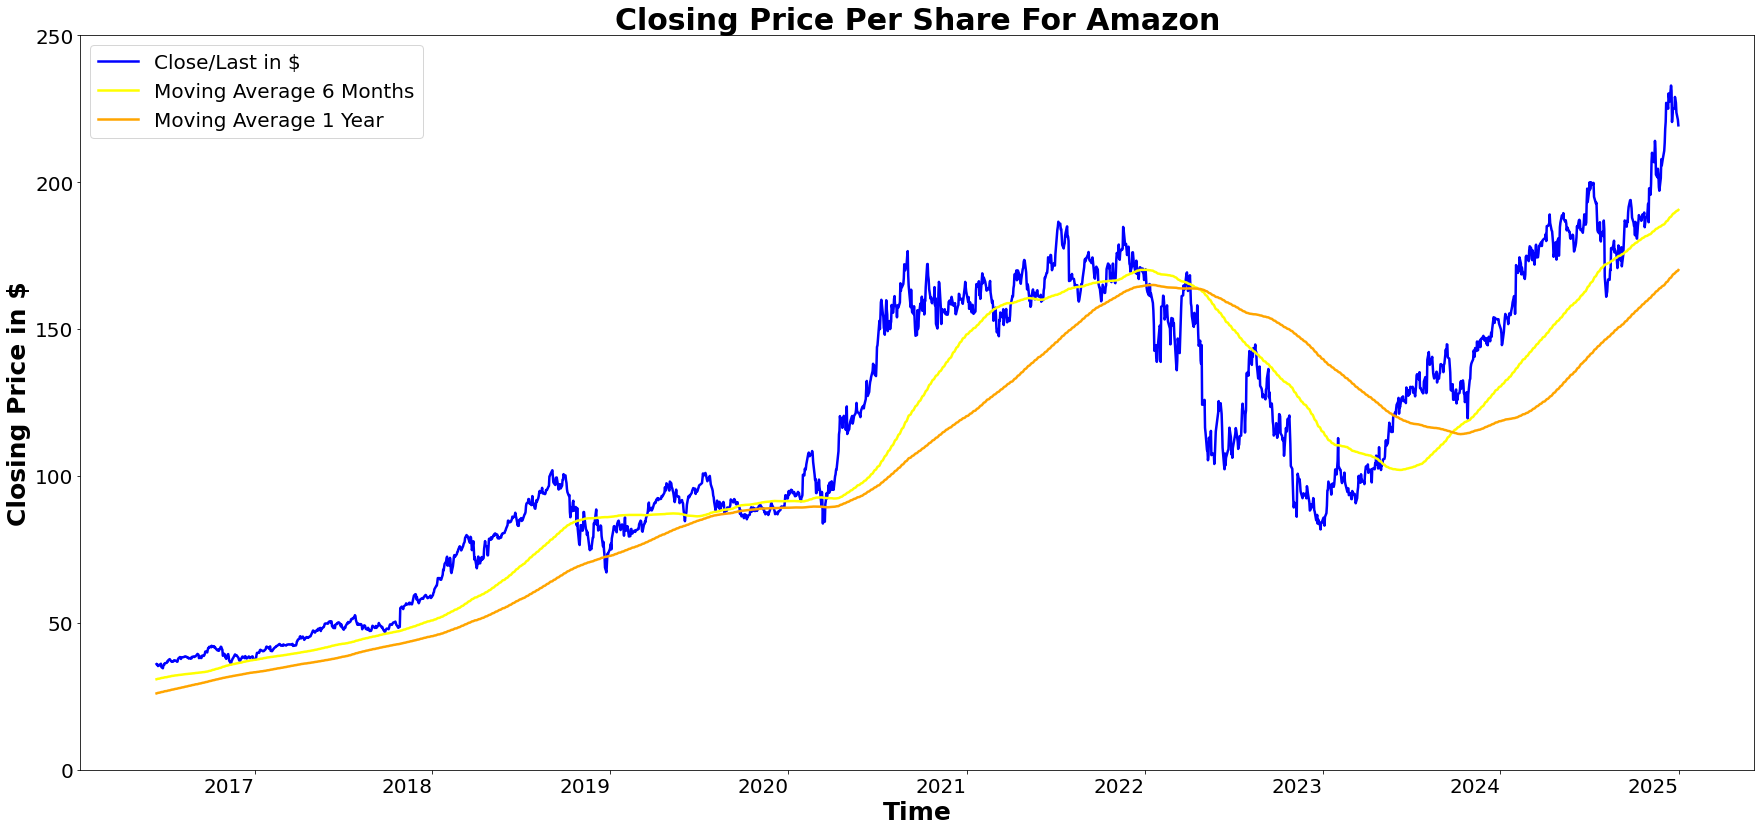

In [18]:
#Using a line chart to graph one year and five year moving averages for all stocks
amazon = plt.figure(figsize=(30,15))
moving_average_amazon_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_amazon_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_amazon_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Amazon', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 300, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

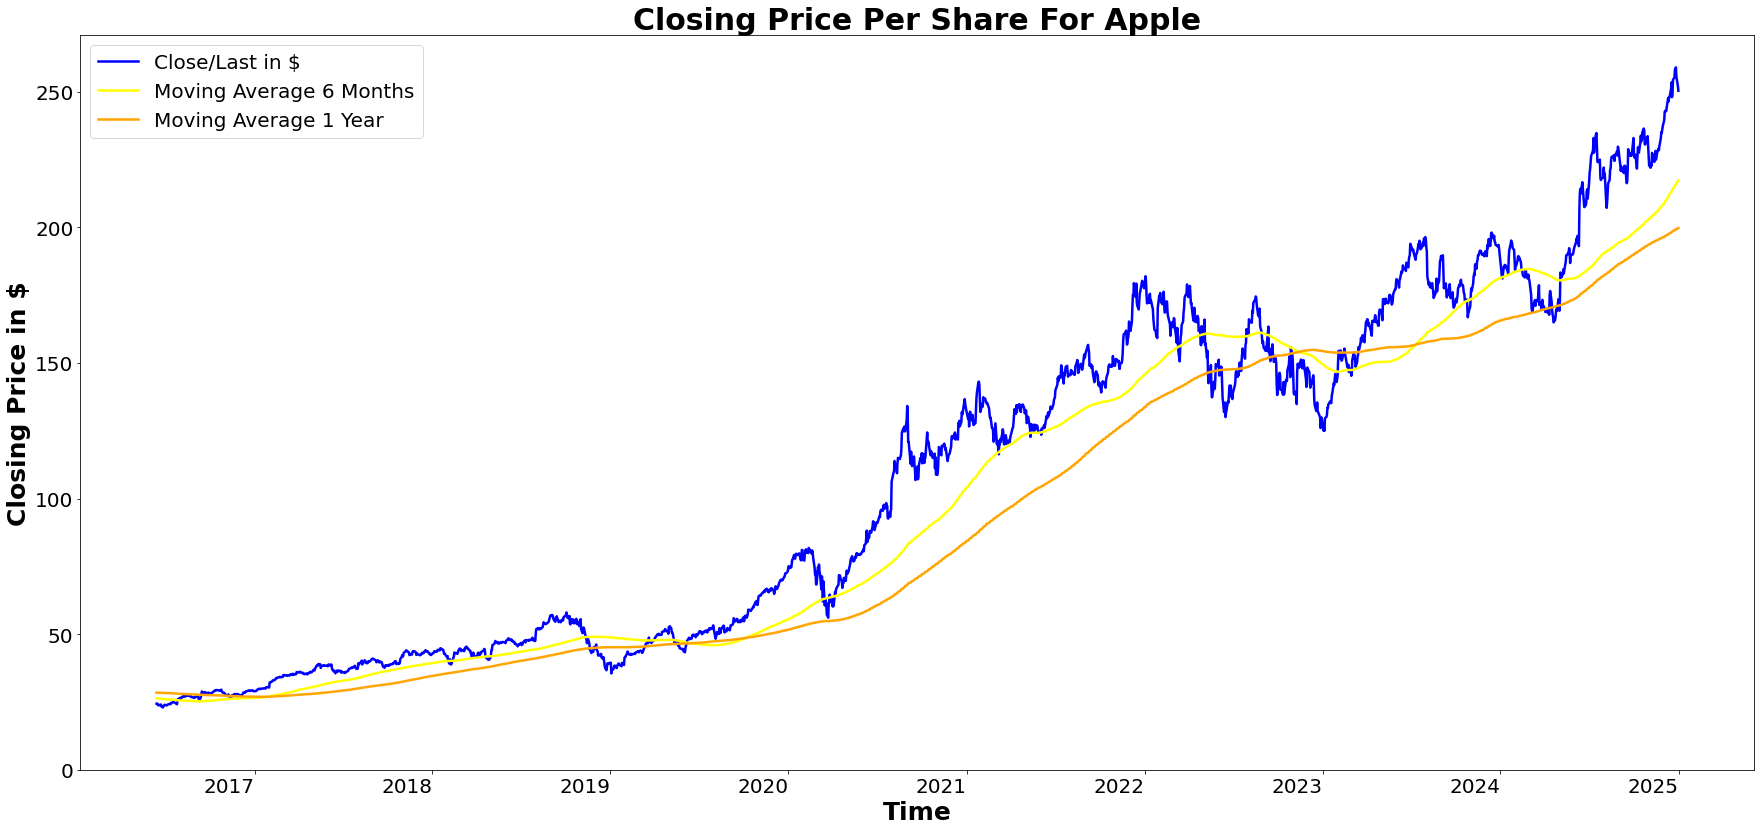

In [19]:
apple = plt.figure(figsize=(30,15))
moving_average_apple_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_apple_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_apple_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Apple', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 300, 50) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

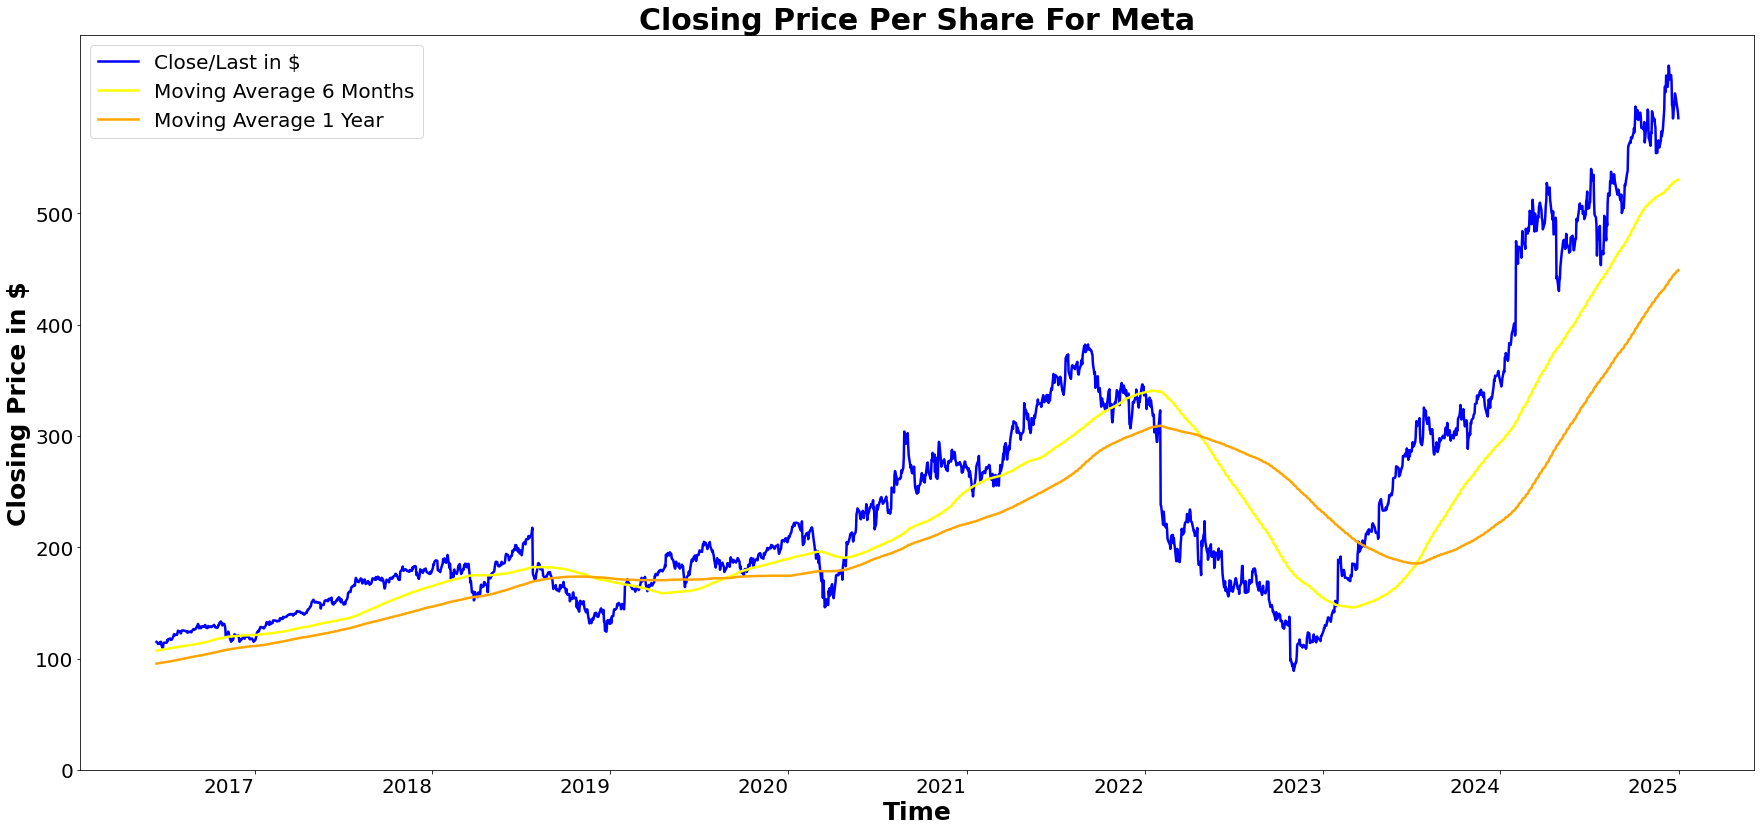

In [20]:
meta = plt.figure(figsize=(30,15))
moving_average_meta_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_meta_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_meta_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Meta', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 600, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

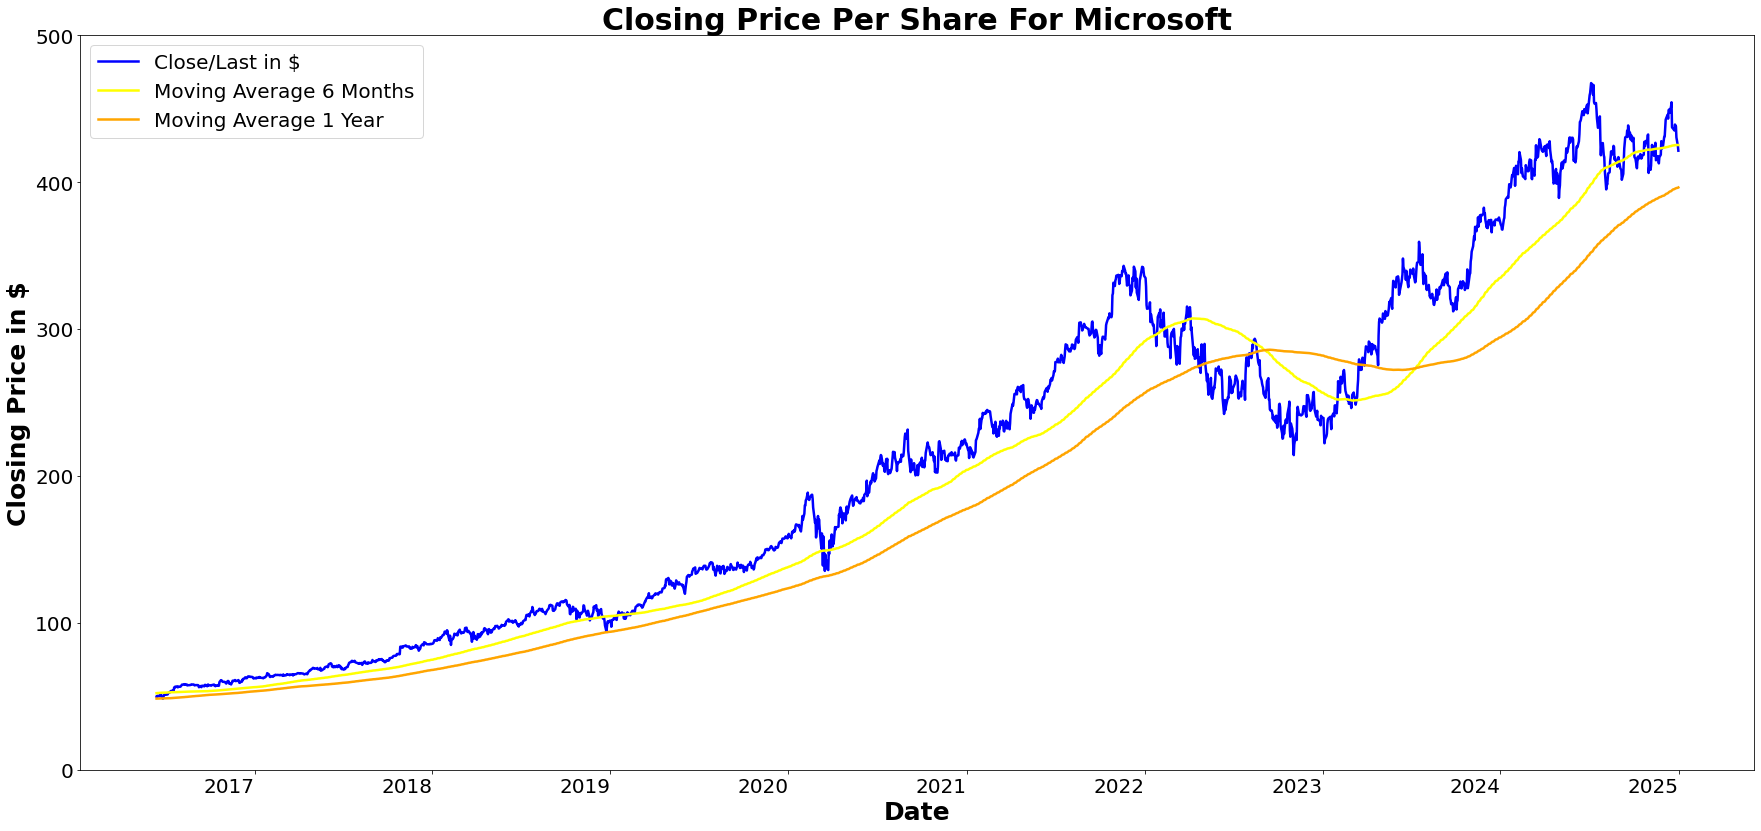

In [21]:
microsoft = plt.figure(figsize=(30,15))
moving_average_microsoft_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_microsoft_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_microsoft_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Microsoft', fontsize = 30, fontweight = 'bold')
plt.xlabel('Date', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 600, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

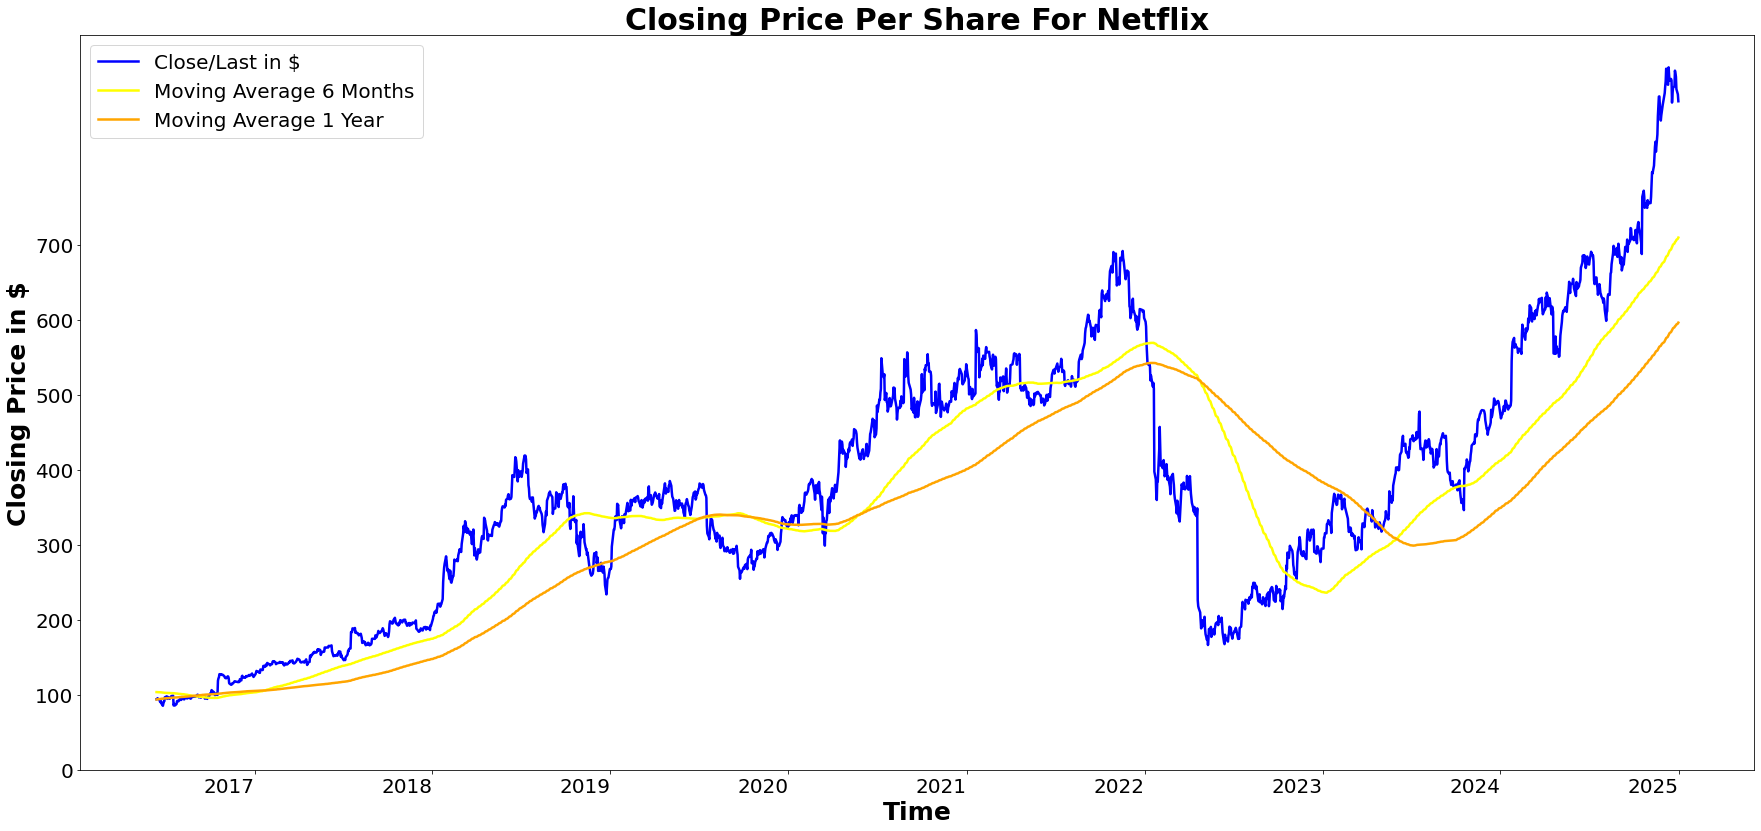

In [22]:
netflix = plt.figure(figsize=(30,15))
moving_average_netflix_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_netflix_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_netflix_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Netflix', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 800, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

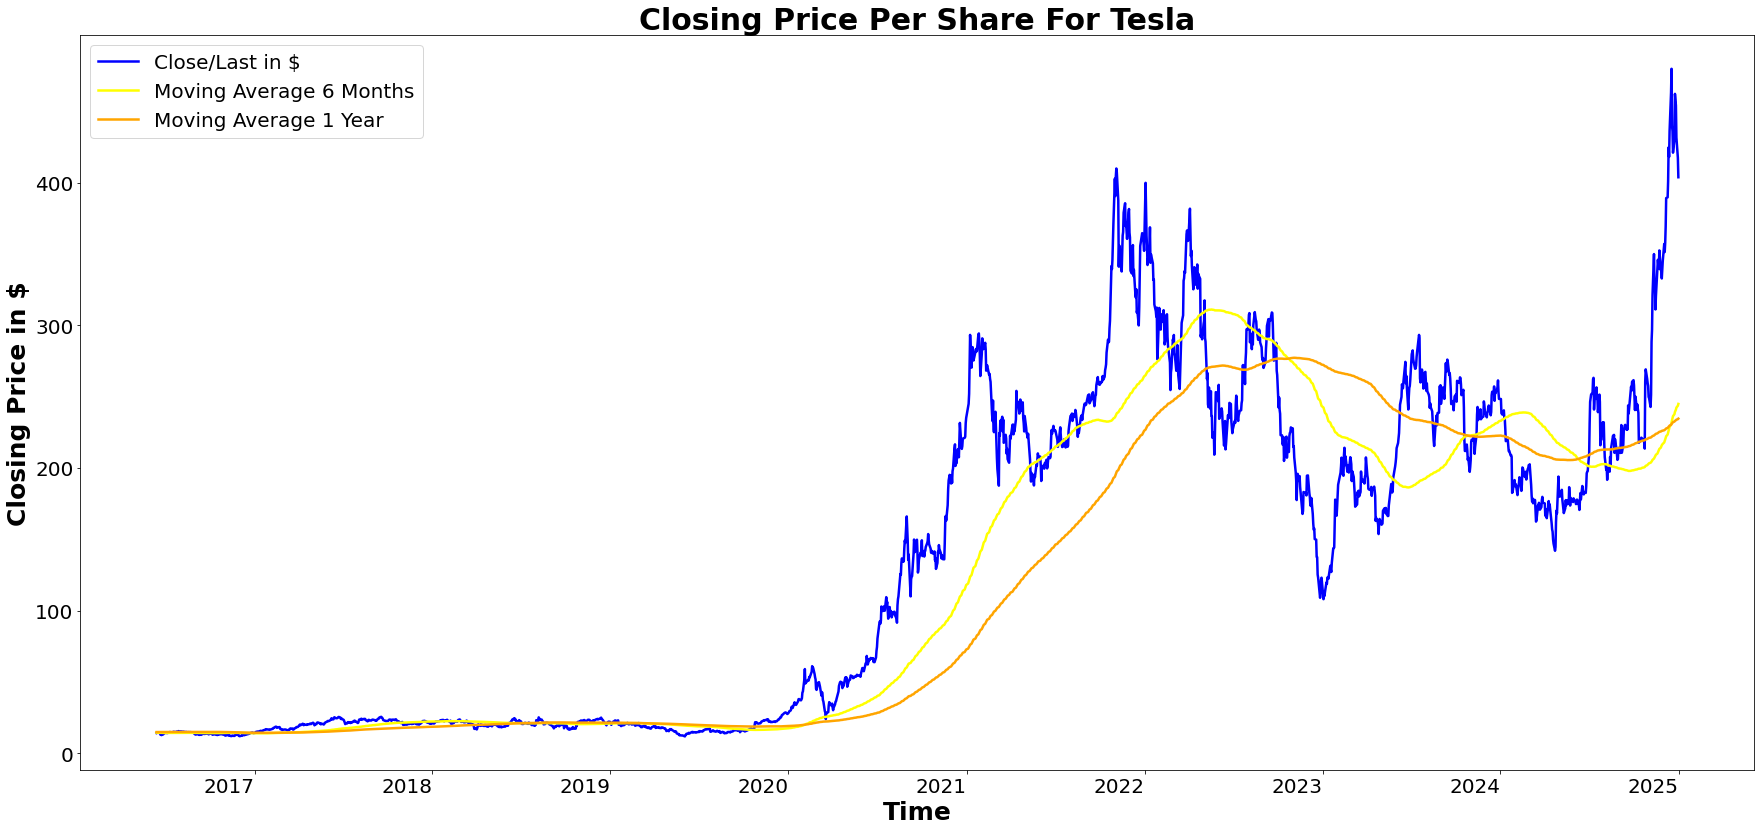

In [23]:
tesla = plt.figure(figsize=(30,15))
moving_average_tesla_stock.groupby('Stock_Name')['Close in $'].plot(legend=True, linewidth=2.5, color = 'blue', label = 'Close/Last in $')
moving_average_tesla_stock.groupby('Stock_Name')['MA_Six_Months'].plot(legend=True, linewidth=2.5, color = 'yellow', label = 'Moving Average 6 Months')
moving_average_tesla_stock.groupby('Stock_Name')['MA_One_Year'].plot(legend=True, linewidth=2.5, color = 'orange', label = 'Moving Average 1 Year')
plt.title('Closing Price Per Share For Tesla', fontsize = 30, fontweight = 'bold')
plt.xlabel('Time', fontsize = 25, fontweight = 'bold')
plt.xticks(rotation = 0, fontsize = 20)
plt.ylabel('Closing Price in $', fontsize = 25, fontweight = 'bold')
y_ticks = np.arange(0, 500, 100) 
plt.yticks(y_ticks, rotation = 0, fontsize = 20)
plt.legend(fontsize=20)

In [24]:
shares_volume.savefig(os.path.join(path, 'Visualizations', 'shares_volume.png'))
six_stocks_ten_years.savefig(os.path.join(path, 'Visualizations', 'six_stocks_ten_years.png'))
amazon.savefig(os.path.join(path, 'Visualizations', 'amazon.png'))
apple.savefig(os.path.join(path, 'Visualizations', 'apple.png'))
meta.savefig(os.path.join(path, 'Visualizations', 'meta.png'))
microsoft.savefig(os.path.join(path, 'Visualizations', 'microsoft.png'))
netflix.savefig(os.path.join(path, 'Visualizations', 'netflix.png'))
tesla.savefig(os.path.join(path, 'Visualizations', 'tesla.png'))